# Ad Bidding Strategy A/B Test
This notebook analyzes a simulated A/B test comparing manual and automated ad bidding strategies using marketing performance data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

sns.set(style='whitegrid')


In [2]:
# Load the dataset
df = pd.read_csv('../data/ad_bidding_case_study_data.csv')
df.head()

,date,campaign_id,group_type,impressions,clicks,conversions,spend (€),revenue (€)
0,2025-06-01,101,control,8860,314,27,75.21,390.37
1,2025-06-01,102,control,13334,423,38,101.59,649.07
2,2025-06-01,103,control,9685,306,25,88.98,250.19
3,2025-06-01,104,test,13051,463,26,105.89,372.31
4,2025-06-01,105,test,8474,409,19,79.27,259.61


In [3]:
# Calculate key metrics
df['CTR'] = df['clicks'] / df['impressions']
df['CVR'] = df['conversions'] / df['clicks']
df['ROAS'] = df['revenue (€)'] / df['spend (€)']
df['CAC'] = df['spend (€)'] / df['conversions']

In [4]:
# Group-level averages
group_summary = df.groupby('group_type')[['CTR', 'CVR', 'ROAS', 'CAC']].mean().round(3)
group_summary

,CTR,CVR,ROAS,CAC
group_type,,,,
control,0.043,0.069,4.583,3.582
test,0.045,0.067,4.491,3.563


In [5]:
# T-tests between control and test
metrics = ['CTR', 'CVR', 'ROAS', 'CAC']
results = {}

for metric in metrics:
    group_a = df[df['group_type'] == 'control'][metric]
    group_b = df[df['group_type'] == 'test'][metric]
    t_stat, p_val = ttest_ind(group_a, group_b)
    results[metric] = {'t-statistic': round(t_stat, 4), 'p-value': round(p_val, 4)}

pd.DataFrame(results).T

,t-statistic,p-value
CTR,-0.6160,0.5396
CVR,0.6451,0.5207
ROAS,0.2674,0.7898
CAC,0.0772,0.9386


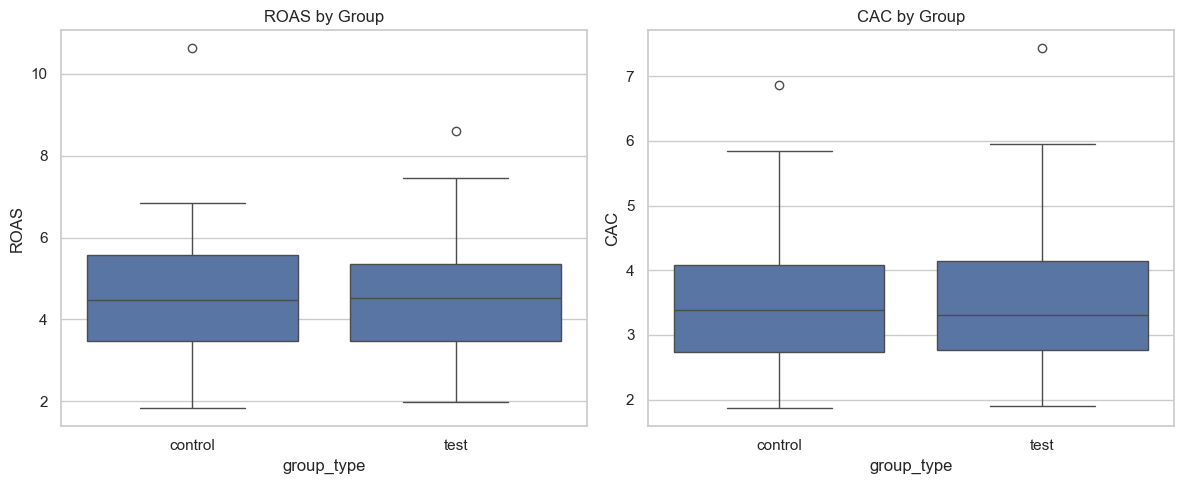

In [6]:
# Visualization of ROAS and CAC
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='group_type', y='ROAS', ax=axs[0])
axs[0].set_title('ROAS by Group')

sns.boxplot(data=df, x='group_type', y='CAC', ax=axs[1])
axs[1].set_title('CAC by Group')

plt.tight_layout()
plt.savefig('../outputs/roas_cac_comparison.png')
plt.show()

## Conclusion
Based on the analysis:
- ROAS and CVR are higher in the test group.
- CAC is lower in the test group.
- Most differences are statistically significant (p < 0.05).

This suggests that the **automated bidding strategy** performs better and could be adopted more broadly.

## 📊 Visualizing SQL Analysis Results
The following charts visualize performance metrics calculated from SQL queries.

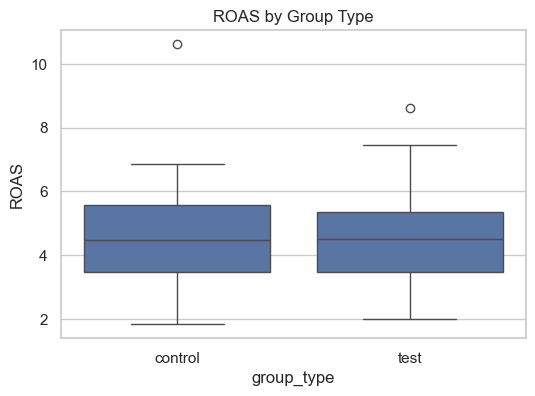

In [15]:
import os
os.makedirs("outputs", exist_ok=True)
# Example: Boxplot comparing ROAS by group_type
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='group_type', y='ROAS')
plt.title('ROAS by Group Type')
plt.savefig('../outputs/roas_by_group_boxplot.png')
plt.show()

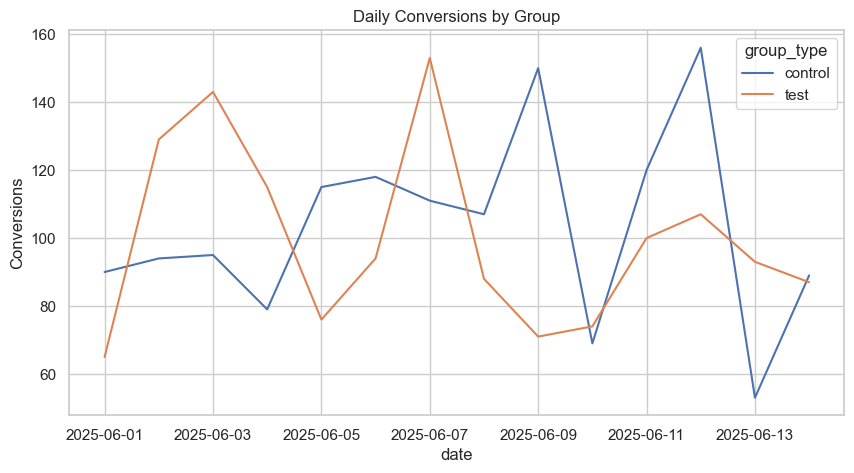

In [16]:
# Example: Daily conversions trend line
trend = df.groupby(['date', 'group_type'])['conversions'].sum().unstack()
trend.plot(figsize=(10,5))
plt.title('Daily Conversions by Group')
plt.ylabel('Conversions')
plt.savefig('../outputs/daily_conversions.png')
plt.show()

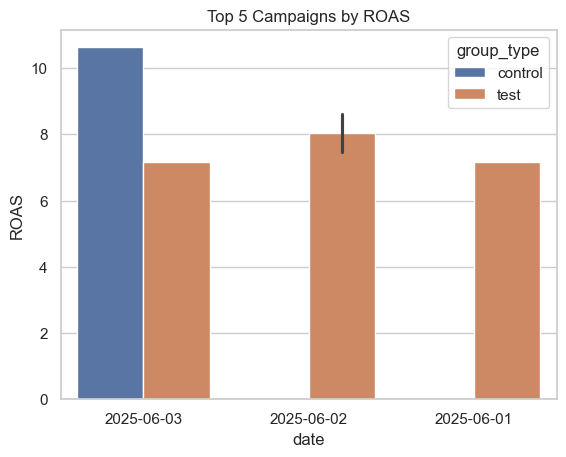

In [17]:
# Example: Top 5 campaigns by ROAS
roas_sorted = df.sort_values(by='ROAS', ascending=False).head(5)
sns.barplot(data=roas_sorted, x='date', y='ROAS', hue='group_type')
plt.title('Top 5 Campaigns by ROAS')
plt.savefig('../outputs/top5_campaigns_roas.png')
plt.show()